TITLE : " Diabetes Classification "

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Loading the dataset

In [ ]:
df=pd.read_csv("/content/diabetes_data.csv",delimiter=';')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
df.shape

(520, 17)

In [ ]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [ ]:
df.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df.shape)

(520, 17)


In [ ]:
print(df["class"].unique())

[1 0]


There are 520 rows and 16 predictor columns for the diabetes class. The diabetes class takes value 1 and 0. Next, I will convert the categorical gender variable to a binary variable

In [ ]:
df["gender"] = df["gender"].apply({"Male":1,"Female":0}.get)

In [ ]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden_weight_loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
genital_thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual_blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


Mean age of people whose medical data were observed is slightly less than 50 years. There are as many younger participants (e.g., between 35 and 50) as older ones (e.g., between 50 and 65).

Exploratory Data Analysis

Next, We will conduct some basic exploratory data analysis to find out the gender and age profile of our dataset as well as our response variable "class" .

<Axes: xlabel='gender', ylabel='count'>

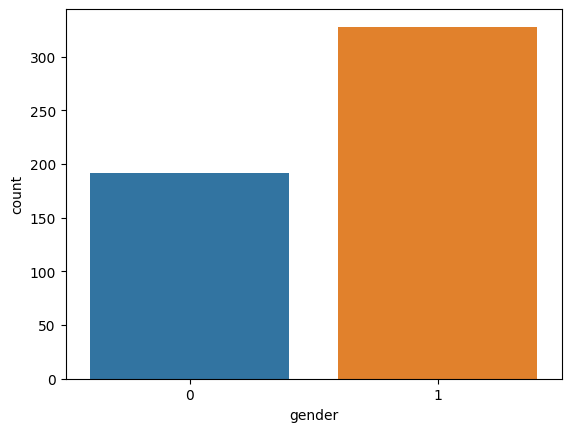

In [ ]:
sns.countplot(x="gender",data=df)

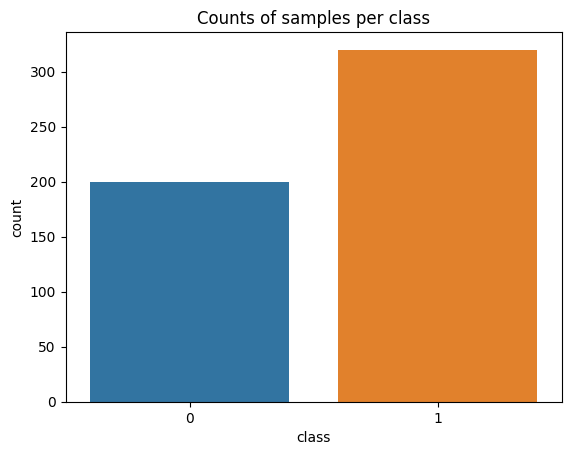

In [ ]:
sns.countplot(x= "class",data = df)
plt.title("Counts of samples per class")
plt.show()

It is interesting to note that diabetes was observed in similar number obese and non-obese individuals.

<Axes: xlabel='class', ylabel='count'>

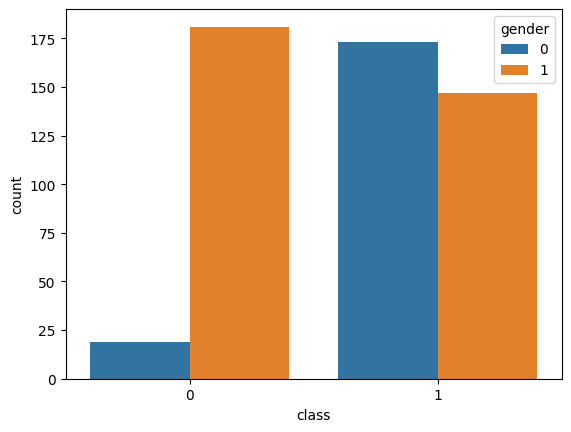

In [ ]:
sns.countplot(x="class", hue="gender", data=df)

<Axes: xlabel='age', ylabel='Count'>

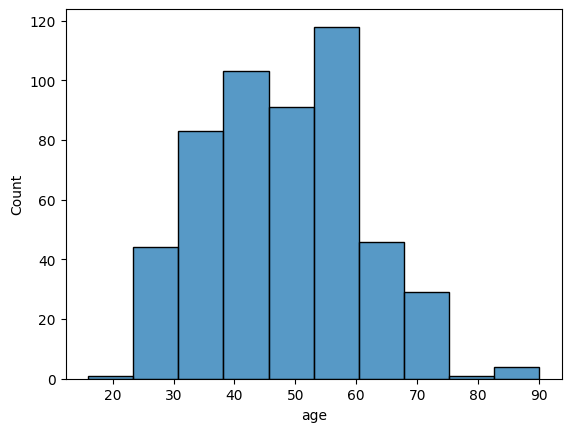

In [ ]:
sns.histplot(df["age"], bins=10)

From initial analysis, we have a majority male dataset but have more females diagnosed with diabetes. Additionally, the histogram shows that we have a majority age group of 50-60 years old.

People with diabetes outnumber healthy ones. There are 200 samples of non-sick people, and 320 where diabetes was confirmed.

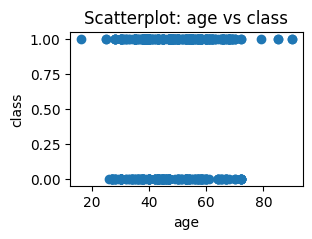

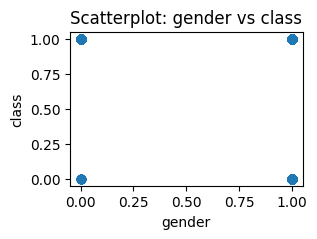

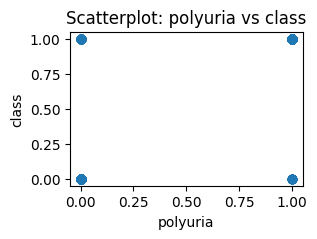

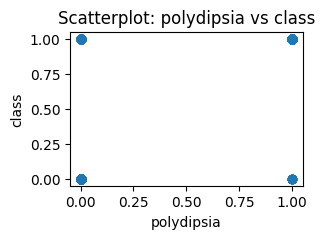

In [ ]:
numeric_columns = ['age','gender','polyuria','polydipsia']
for column in numeric_columns:
    plt.figure(figsize=(3,2))
    plt.scatter(df[column],df['class'])
    plt.xlabel(column)
    plt.ylabel('class')
    plt.title(f'Scatterplot: {column} vs class')
    plt.show()

Correlation of Parameters

<Axes: >

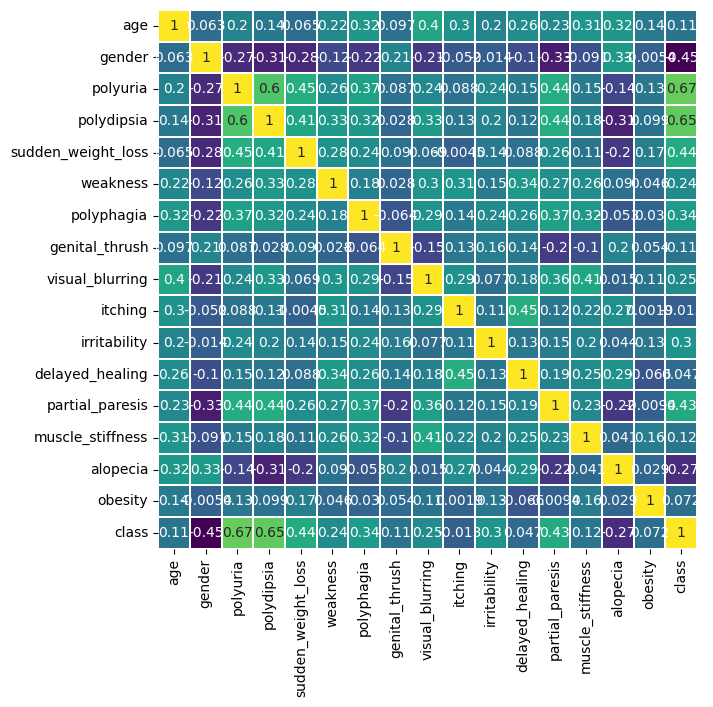

In [ ]:
plt.figure(figsize = (7, 7))
sns.heatmap(df.corr(),annot=True,square = True, linewidths = 0.2, cmap = 'viridis', cbar = False)

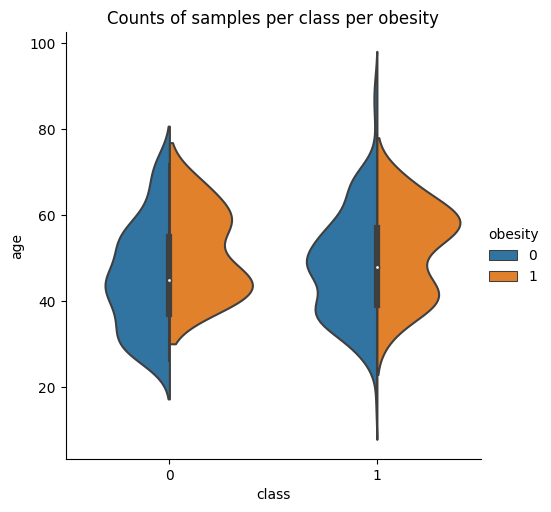

In [ ]:
sns.catplot(x = "class", y = "age", data = df, hue = "obesity", kind = "violin", split = True)
plt.title("Counts of samples per class per obesity")
plt.show()

There are more men than women in the dataset. Almost equal number of male patients were diagnosed with and without diabetes. However, diabetes was observed in slightly more women than men.

Next, we will split the dataset into training and test datasets and utilize various algorithms to predict the response variable class .

In [ ]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [ ]:
scaled_x

array([[-0.6613669 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762, -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.25,random_state=135)

Method

**Model 1**: Logistic Regression

In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

Evaluation of Model 1


In [ ]:
log_prediction = log_model.predict(x_test)

In [ ]:
print(classification_report(y_test,log_prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        48
           1       0.97      0.89      0.93        82

    accuracy                           0.92       130
   macro avg       0.90      0.92      0.91       130
weighted avg       0.92      0.92      0.92       130



In [ ]:
print(confusion_matrix(y_test,log_prediction))

[[46  2]
 [ 9 73]]


In [ ]:
log_f1score = f1_score(y_test,log_prediction)
print(log_f1score)

0.9299363057324841


**Model 2**: K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_prediction = knn.predict(x_test)

In [ ]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        48
           1       1.00      0.89      0.94        82

    accuracy                           0.93       130
   macro avg       0.92      0.95      0.93       130
weighted avg       0.94      0.93      0.93       130



In [ ]:
print(confusion_matrix(y_test, knn_prediction))

[[48  0]
 [ 9 73]]


In [ ]:
knn_f1score = f1_score(y_test, knn_prediction)
print(knn_f1score)

0.9419354838709678


**Model 3**: Decision Trees

In [ ]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree_prediction = dtree_model.predict(x_test)

In [ ]:
print(classification_report(y_test,dtree_prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        48
           1       0.99      0.94      0.96        82

    accuracy                           0.95       130
   macro avg       0.95      0.96      0.95       130
weighted avg       0.96      0.95      0.95       130



In [ ]:
print(confusion_matrix(y_test,dtree_prediction))

[[47  1]
 [ 5 77]]


In [ ]:
dtree_f1score = f1_score(y_test,dtree_prediction)
print(dtree_f1score)

0.9625


**Model 4**: Random Forests

In [ ]:
randomtree_model = RandomForestClassifier(n_estimators=100)
randomtree_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rtree_prediction = randomtree_model.predict(x_test)

In [ ]:
print(classification_report(y_test,rtree_prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       1.00      0.94      0.97        82

    accuracy                           0.96       130
   macro avg       0.95      0.97      0.96       130
weighted avg       0.97      0.96      0.96       130



In [ ]:
print(confusion_matrix(y_test,rtree_prediction))

[[48  0]
 [ 5 77]]


In [ ]:
rtree_f1score = f1_score(y_test,rtree_prediction)
print(rtree_f1score)

0.9685534591194969


Comparing the models to find the best model based on their F1 score.

In [ ]:
metric = pd.DataFrame({"Method":["Logistic Regression","KNN","Decision Trees","Random Forest"]
                       ,"f1-score":[log_f1score,knn_f1score,dtree_f1score,rtree_f1score]})
print(metric)

                Method  f1-score
0  Logistic Regression  0.929936
1                  KNN  0.941935
2       Decision Trees  0.962500
3        Random Forest  0.968553


From the above metric we can see that the "Random Forest" model is having the highest f1 score value. So, we can say that the "Random Forest" model is the best fit model for our dataset.

In [ ]:
print(np.array(y_test))

[1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1]


In [ ]:
rtree_prediction

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

4. Results & Discussion

I chose to utilize f1-scores to determine the most accurate model in predicting diabetes in a particular patient. f1-scores take into account both precision and recall to determine the percentage of positive predictions that were determined to be correct. In an issue such as diabetes, the false negative is highly critical.
Based on the respective f1 scores, it appears that the Random Forest Algorithm is the most suitable in predicting diabetes. Lets visualize the important variables

Text(0, 0.5, 'Feature')

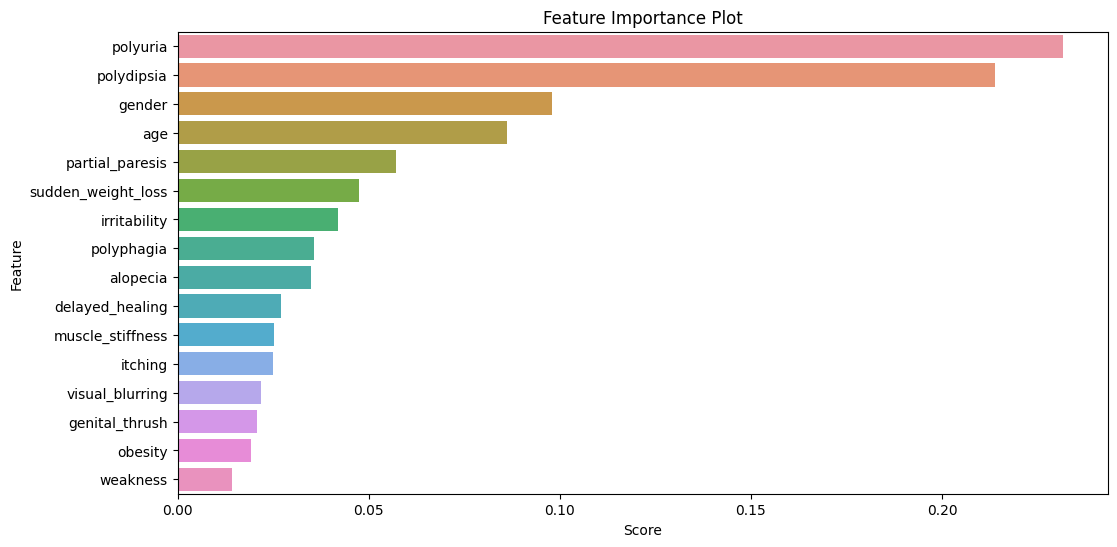

In [ ]:
plt.figure(figsize=(12,6))
feature_imp = pd.Series(randomtree_model.feature_importances_, index = x.columns).sort_values(ascending = False)
feature_plot = sns.barplot(x = feature_imp, y = feature_imp.index)
feature_plot.set_title("Feature Importance Plot")
feature_plot.set_xlabel("Score")
feature_plot.set_ylabel("Feature")

Here, we see that polydipsia and polyuria are the 2 most important conditions which help to predict a person having diabetes. Polydispia is the medical term for experiencing extreme thirst while Polyuria is a condition where a person has excessive urination. Cross-referencing this with online research, these are 2 particular conditions which are found to be early indications of a person having diabetes.